<a href="https://colab.research.google.com/github/islamicity/225-github-actions-demo/blob/master/Supermarket_Sales_of_Python_Intro_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# call libraries
# Python Libraries are a set of useful functions that eliminate the need for writing codes from scratch.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

# Read Data and Clean

In [2]:
# read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
# df = pd.read_csv('/content/drive/MyDrive/Deck Mini Course RevoU/supermarket_sales - Sheet1.csv')
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [4]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [5]:
df_cleaned = df.copy()
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity']

print(df_cleaned.dtypes)
df_cleaned.head()

Date             datetime64[ns]
Payment                  object
Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Revenue                 float64
dtype: object


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
# check typo

df_cleaned['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
# check typo

for col_name in ['Payment','Branch', 'City', 'Customer type',
       'Gender', 'Product line' ]:
       print(df_cleaned[col_name].value_counts(),'\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
dict_typo = {'male': 'Male',
             'female': 'Female',
             'fml' : 'Female'}

df_replaced = df_cleaned.replace(dict_typo)
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#check is there any duplicated invoice
df_replaced['Invoice ID'].duplicated().sum()

0

In [ ]:
#re-checking
for col_name in ['Payment','Branch', 'City', 'Customer type',
       'Gender', 'Product line' ]:
       print(df_replaced[col_name].value_counts(),'\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



# EDA

In [ ]:
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


### Daily Trend Overall

In [ ]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue','Quantity'].sum()
agg_daily.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


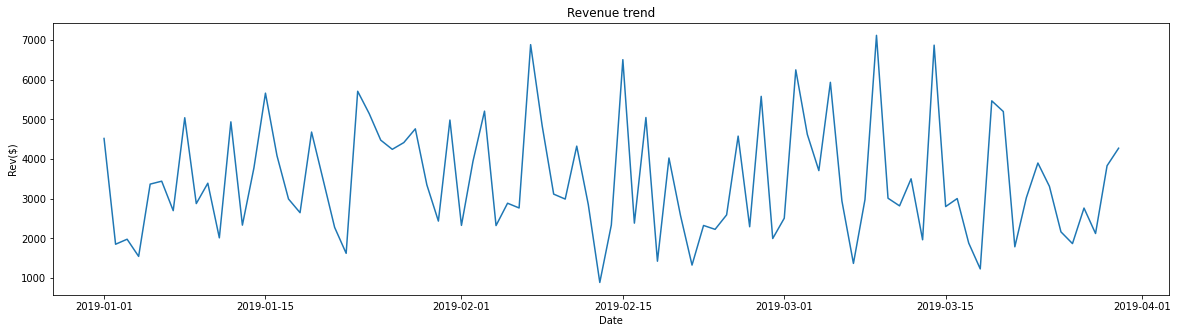

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Date','Revenue', data=agg_daily)

plt.title('Revenue trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

In [ ]:
# sns.lineplot(data =agg_daily, x='Date', y='Revenue' )

### By Payment

In [ ]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID': 'nunique'})
agg_payment

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


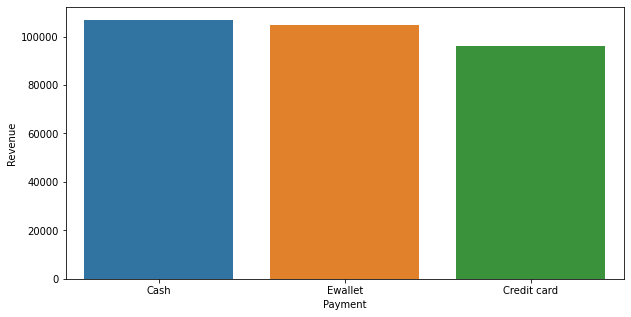

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot('Payment', 'Revenue', data = agg_payment.sort_values('Revenue', ascending=False))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


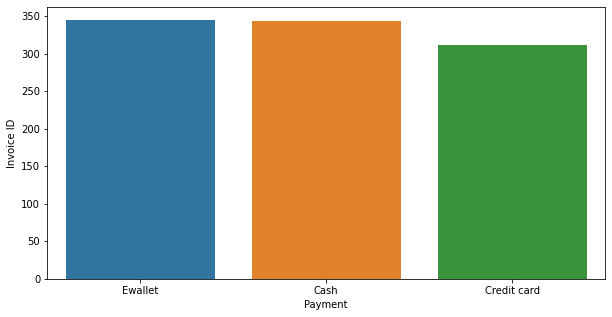

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot('Payment', 'Invoice ID', data = agg_payment.sort_values('Invoice ID', ascending=False))

([<matplotlib.patches.Wedge at 0x7f788f860dd0>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

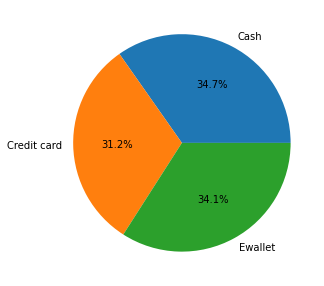

In [ ]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'],autopct='%.1f%%')

# By Gender and Product type

In [ ]:
agg_gend = df_replaced.groupby(['Gender','Product line'], as_index=False)['Invoice ID'].nunique()
agg_gend.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


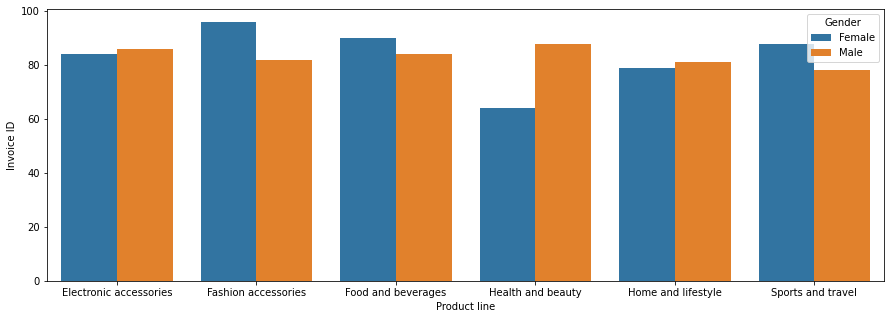

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot('Product line', 'Invoice ID', data =agg_gend, hue = 'Gender' )

# SUMM